# Notes służący wyłącznie do wstępnej analizy danych


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import graph as gu


In [25]:
connections = pd.read_csv("connection_graph.csv", low_memory=False)
connections.head()

,Unnamed: 0,company,line,departure_time,arrival_time,start_stop,end_stop,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon
0,0,MPK Autobusy,A,20:52:00,20:53:00,Zajezdnia Obornicka,Paprotna,51.148737,17.021069,51.147752,17.020539
1,1,MPK Autobusy,A,20:53:00,20:54:00,Paprotna,Obornicka (Wołowska),51.147752,17.020539,51.144385,17.023735
2,2,MPK Autobusy,A,20:54:00,20:55:00,Obornicka (Wołowska),Bezpieczna,51.144385,17.023735,51.141360,17.026376
3,3,MPK Autobusy,A,20:55:00,20:57:00,Bezpieczna,Bałtycka,51.141360,17.026376,51.136632,17.030617
4,4,MPK Autobusy,A,20:57:00,20:59:00,Bałtycka,Broniewskiego,51.136632,17.030617,51.135851,17.037383


Czas może być reprezentowany w postaci liczby całkowitej reprezentującej sekundy od godziny 00:00

In [3]:
stops = set(connections[['start_stop']+['start_stop_lat']+['start_stop_lon']].itertuples(index=False, name=None))
stops.update(set(connections[['end_stop']+['end_stop_lat']+['end_stop_lon']].itertuples(index=False, name=None)))
len(stops)
stops_df = pd.DataFrame(stops)

In [37]:
start_stops = connections[['start_stop', 'start_stop_lat', 'start_stop_lon']]
start_stops.columns = ['stop', 'lat', 'lon']
end_stops = connections[['end_stop', 'end_stop_lat', 'end_stop_lon']]
end_stops.columns = ['stop', 'lat', 'lon']

stops_concatenated = pd.concat(
    [
        start_stops,
        end_stops
    ])
stops_concatenated.drop_duplicates()
stops = stops_concatenated.groupby('stop').mean()
list(stops.itertuples(index=True, name=None))

[('8 Maja', 51.113568286723066, 17.091411461279883),
 ('AUCHAN', 51.0520648, 16.97405354),
 ('Adamczewskich', 51.120898675, 16.869548215000002),
 ('Adamieckiego', 51.07377016813747, 16.96332460414634),
 ('Aleja Architektów', 51.13887885021542, 16.928942962301587),
 ('Aleja Pracy', 51.09172218661829, 16.985944894517417),
 ('Aleja Wędrowców', 51.08832770614583, 16.992090301354168),
 ('Arabska', 51.0511357059727, 17.09237494334471),
 ('Arachidowa', 51.15434329260627, 16.898375872953018),
 ('Arena', 51.09458113, 17.026832745),
 ('Arkady (Capitol)', 51.101414365310674, 17.029279174500797),
 ('Armii Krajowej', 51.08721407808318, 17.069442098155513),
 ('Armii Krajowej (Bogedaina)', 51.08543714545977, 17.0657611691954),
 ('Asfaltowa (szkoła)', 51.06427, 17.042356),
 ('Awicenny', 51.087703808146344, 16.95261184087805),
 ('Awicenny (Poczta Polska)', 51.08672704, 16.94930841),
 ('Awicenny (Stacja kolejowa)', 51.091412710149626, 16.95055401895262),
 ('Azaliowa', 51.16407111, 17.111954609999998),
 

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
nodes = []
for stop in stops:
    nodes.append(gu.Node(*stop, []))


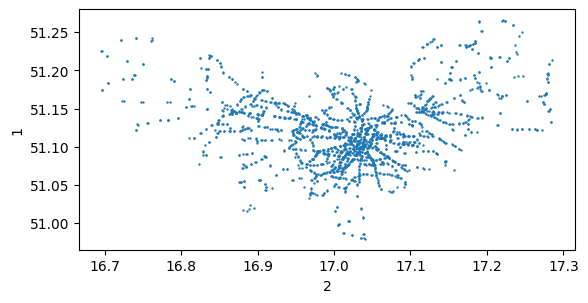

In [6]:

ax = stops_df.plot.scatter(x=2, y=1, s=0.5)
ax.axes.set_aspect('equal')

In [2]:
graph = gu.Graph('connection_graph.csv')

In [10]:
k1 = list(graph.graph.keys())[-1]
n = graph.graph[k1]

k2 = list(graph.graph.keys())[5]
n2 = graph.graph[k2]

In [12]:
n.distance(n2)

0.002036969416875062

#  Skalowanie odległości

In [23]:


def get_time_distance(n: gu.Node, e: gu.Edge):
    if e in (n.neighbours):
        time = e.arrival_time.time - e.departure_time.time
        return time, n.distance(e.dest) 
    return 0, 0

time_distance = [(time, dist) for time, dist in graph.distinct_edge_bfs(n, get_time_distance)]

time_distance

[(60, 9.181196035525226e-05)]